In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import sys
import os
from scipy.stats import norm


In [8]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

from utils.normales import funcion_normal,funcion_densidad_mixture

### Mixture de normales
- No es lo mismo una combinacion lineal que una mixture, en una mixture los coeficientes ${\alpha_i}$ suman 1 esto es ${\sum{\alpha_i}}=1$. 
- Sean dos variables aleatorias ${X_1 \sim \mathcal{N}(-1,9)}$ y ${X_2 \sim \mathcal{N}(-1,4)}$. Mezclarlas con 0.4 y 0.6 tal que la función de densidad queda: 

0.4 ${\phi_1(x)}$+0.6 ${\phi_2(x)}$ 
donde: 

${\phi_1(x)=\frac{1}{{\sqrt(18*\pi)}}e ^{-\frac{(x+1)^2}{18}}}$

${\phi_2(x)=\frac{1}{{\sqrt(8*\pi)}}e ^{-\frac{(x+1)^2}{8}}}$

#### a) graficar la pdf de la mixtura para valores del sporte de la variable aleatoria entre -10 y 10 con deltas de 0.1

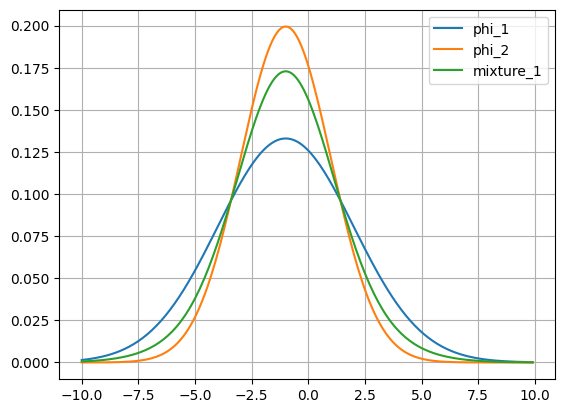

,datos,phi_1,phi_2,mixture_1
0,-10.0,0.001477,0.000008,0.000596
1,-9.9,0.001632,0.000010,0.000659
2,-9.8,0.001800,0.000012,0.000728
3,-9.7,0.001984,0.000016,0.000803
4,-9.6,0.002184,0.000019,0.000885


In [9]:
from scipy.stats import kurtosis, skew

w1=0.4
w2=0.6
mu1=-1
mu2=-1

datos=np.arange(start=-10,stop=10,step=0.1)
df_datos=pd.DataFrame(datos,columns=['datos'])


#df_datos['phi_1']=df_datos['datos'].apply(funcion_normal,media=-1,varianza=9)
#df_datos['phi_2']=df_datos['datos'].apply(funcion_normal,media=-1,varianza=4)
#df_datos['mixture_1']=df_datos['datos'].apply(funcion_densidad_mixture,media_1=-1,varianza_1=9,media_2=-1,varianza_2=4,peso_1=.4,peso_2=.6)

df_datos['phi_1']=norm.pdf(loc=mu1,scale=3,x=df_datos['datos'])
df_datos['phi_2']=norm.pdf(loc=mu2,scale=2,x=df_datos['datos'])


df_datos['mixture_1']=w1*df_datos['phi_1']+w2*df_datos['phi_2']

plt.figure()
plt.plot(df_datos['datos'],df_datos['phi_1'],label='phi_1')
plt.plot(df_datos['datos'],df_datos['phi_2'],label='phi_2')
plt.plot(df_datos['datos'],df_datos['mixture_1'],label='mixture_1')
plt.legend()
plt.grid()
plt.show()

df_datos.head()


## Misma media diferente varianza se supone que es simetrica y leptocurtica
#print(f"curtosis en exeso: {df_datos['mixture_1'].kurt():0.4f}")
# Sin embargo kurt me da -0.62 

#Esto no tiene sentído estadístico porque es la curtosis de la pdf, La cutosis y simetria se calcula sobre muestras
#print("Curtosis en exceso:", kurtosis(df_datos['mixture_1']))  # (Fisher=True por defecto)


#Asi es como se grafica sin necesidad de armar la función, armo la función solo porque el ejercicio lo pide: 
#norm.pdf(loc=-1,scale=3,x=df_datos['datos'])
#norm.pdf(loc=-1,scale=2,x=df_datos['datos'])

#df_norm_a=pd.DataFrame(norm_a,columns=['datos_norm_a'])
#df_norm_a.plot(legend='pdf_norm_a').grid()



### b) Solamente observando el gráfico, se puede afirmar que la mixture es asimétrica. 
Rta: con el gráfico del la pdf no se puede dar inferencia estadística ni de curtosis ni de la asimetría.

### c) Calcular media, varianza y el coeficiente de asimetria y el de curtosis de la mixtura. 
Esto requiere tomar muestras al azar de la normal 1 y la normal 2. Cuantas? bueno el 40% del total de las muestras seran de la normal 1 y el 60% de la normal 2

In [10]:
#Tomamos muestras para calcular
n=400_00

muestra_1 = np.random.normal(loc=-1, scale=3, size=int(n * w1))
muestra_2 = np.random.normal(loc=-1, scale=2, size=int(n * w2))
muestra_mixture=np.concatenate([muestra_1,muestra_2])

muestra_mixture_df=pd.DataFrame(muestra_mixture,columns=['muestra_mixture'])

## En funcion de los resultados es leptocurtica y simétrica
## Calculamos los valores pedidos: 
print(f"La media de la mixtura es: {muestra_mixture_df['muestra_mixture'].mean():.2f}")
print(f"La varianza de la mixture es: {muestra_mixture_df['muestra_mixture'].std()**2:.2f}")
print(f"Coeficientes de asimetria es: {muestra_mixture_df['muestra_mixture'].skew():.2f}")
print(f"curtosis en exceso de la mixture es: {kurtosis(muestra_mixture_df['muestra_mixture']):.2f}")
print(f"curtosis de la mixture es: {kurtosis(muestra_mixture_df['muestra_mixture'],fisher=False):.2f}")

from scipy.stats import moment

print(f"Primer momento centrado: {moment(muestra_mixture_df,1)}") ## esto no es lo mismo que la media
print(f"segundo momento centrado: {moment(muestra_mixture_df,2)}")
print(f"tercer momento centrado: {moment(muestra_mixture_df,3)}")
print(f"cuarto momento centrado: {moment(muestra_mixture_df,4)}")




La media de la mixtura es: -1.00
La varianza de la mixture es: 6.04
Coeficientes de asimetria es: -0.00
curtosis en exceso de la mixture es: 0.49
curtosis de la mixture es: 3.49
Primer momento centrado: [0.]
segundo momento centrado: [6.03757153]
tercer momento centrado: [-0.01182223]
cuarto momento centrado: [127.21282498]


### Ahora vamos a hacer los mismos cálculos pero en forma teórica usando integrales


Primer momento no centrado (que es la media):
$$E(X_M)=\int x * f(x)dx$$
reemplazando por la definición de mixture
$$ \int x*0.4\phi_1(x)dx+0.6\phi_2(x)dx$$
aplicando propiedades de intregrales
$$ 0.4 \int x \phi_1(x) dx +0.6 \int x \phi_2(x) dx$$
Pero estas últimas integrales son por definicion las medias correspondientes, entonces

$$0.4* \mu_1+0.6*\mu_2 $$

### Esto muestra que para una mixture de normales con igual media, da como resultado algo con la misma media


### Varianza

Antes veamos la definición de varianza: 
$$
    VAR(X)=E[(x-\mu)^2]=\int (x-\mu)^2* f_x(x)dx
$$

Ahora reemplazamos $f_x(x) por la función de la mixture como hicimos en el paso anterior: 

$$
    \int
$$

In [12]:


# Normalización (por si acaso)
dx = 0.1
mixture = df_datos['mixture_1'].values  # Use the mixture density from the grid
x = datos
area = np.sum(mixture * dx)
# Media
mu = np.sum(x * mixture * dx) / area

# Varianza
var = np.sum((x - mu)**2 * mixture * dx) / area
std = np.sqrt(var)

# Asimetría (skewness)
skewness = np.sum(((x - mu)**3) * mixture * dx) / (area * std**3)

# Curtosis
kurt = np.sum(((x - mu)**4) * mixture * dx) / (area * std**4)
kurt_excess = kurt - 3

# Resultados
print(f"Media: {mu:.4f}")
print(f"Varianza: {var:.4f}")
print(f"Asimetría: {skewness:.4f}")
print(f"Curtosis: {kurt:.4f}")
print(f"Curtosis en exceso: {kurt_excess:.4f}")





Media: -0.9955
Varianza: 5.9456
Asimetría: 0.0237
Curtosis: 3.3929
Curtosis en exceso: 0.3929


Media: 0.0500
Varianza 0.0035
Coeficiente de asimetría: 0.9479567894208701
Curtosis: 2.3803756694895446
Curtosis en Exceso: -0.6196243305104554


<Axes: >

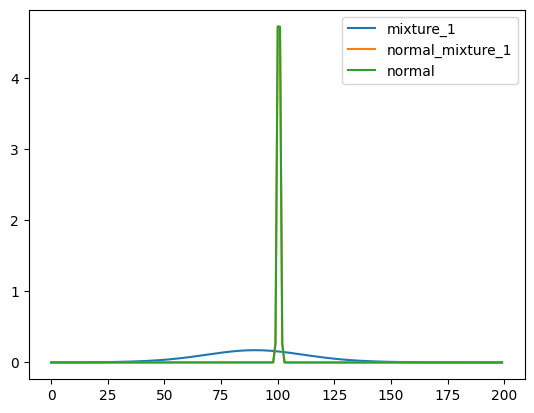

In [6]:

print(f"Media: {df_datos['mixture_1'].mean():0.4f}")
print(f"Varianza {df_datos['mixture_1'].std()**2:0.4f}")
print(f"Coeficiente de asimetría: {df_datos['mixture_1'].skew()}")
print(f"Curtosis: {df_datos['mixture_1'].kurtosis()+3}")
print(f"Curtosis en Exceso: {df_datos['mixture_1'].kurtosis()}")

varianza=df_datos['mixture_1'].std()**2
desvio=np.sqrt(varianza)
media=df_datos['mixture_1'].mean()
#Genero una normal con la misma media y varianza que la mixtura

df_datos['normal_mixture_1']=df_datos['datos'].apply(funcion_normal,media=media,varianza=varianza)



normal = norm.pdf(df_datos['datos'], loc=media, scale=desvio) ## genero una funcion de distribucion normal con python para ver que la que tengo a mano da lo mismo
df_datos['normal']=pd.DataFrame(normal)

df_datos['mixture_1'].plot(legend='mixture_1')
df_datos['normal_mixture_1'].plot(legend='normal_mixture_1')
df_datos['normal'].plot(legend='normal')
    



En funcion de las variables es platicurtica (KE<0).
Es asimétrica positiva (cerca de 1  y deberia ser cero)

### j) Muestra de 2000 valores aleatorios de la mixtura y hacer un QQplot

### Asimetria y Curtosis

Asimetría: -0.6233243530752525
Curtosis en Exeso:  -0.16045655008982962


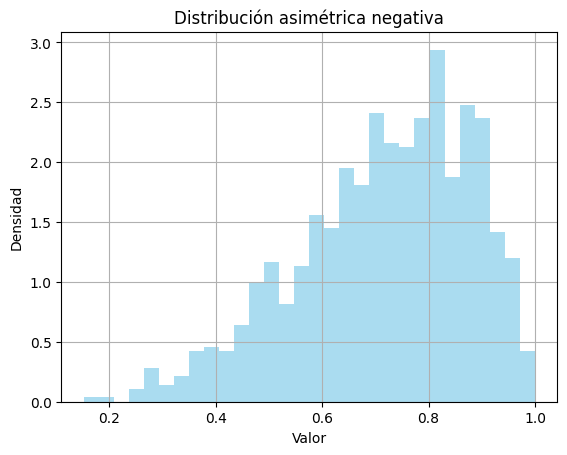

In [15]:

from scipy.stats import skew
from scipy.stats import kurtosis

# Distribución Beta(2, 5): asimétrica positiva
data_pos = np.random.beta(a=2, b=5, size=1000)

# Reflejar para obtener asimetría negativa
data_neg = 1 - data_pos

# Ver asimetría
print("Asimetría:", skew(data_neg))
print("Curtosis en Exeso: ",kurtosis(data_neg))
# Graficar
plt.hist(data_neg, bins=30, density=True, alpha=0.7, color='skyblue')
plt.title("Distribución asimétrica negativa")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.grid(True)
plt.show()


#### Curtosis en exceso=0 y asimetrica negativa

Asimetría: -0.8531
Curtosis (exceso, Fisher): 0.7358


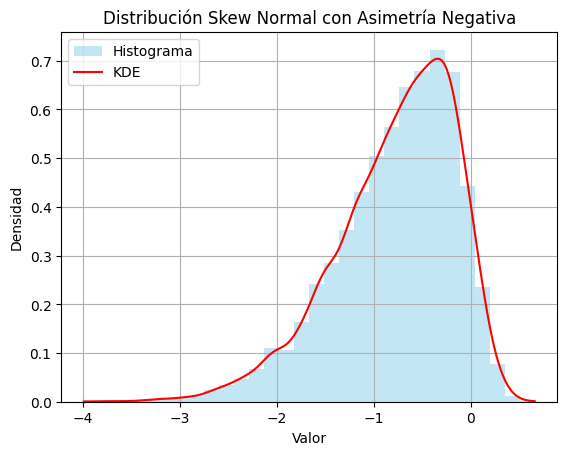

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, skewnorm
from scipy.stats import gaussian_kde

# Parámetro negativo para asimetría negativa
shape = -5

# Generamos datos
data = skewnorm.rvs(a=shape, size=10000)

# Estadísticas
asimetria = skew(data)
curtosis_fisher = kurtosis(data)

print(f"Asimetría: {asimetria:.4f}")
print(f"Curtosis (exceso, Fisher): {curtosis_fisher:.4f}")

# Graficar histograma + KDE
plt.hist(data, bins=30, density=True, alpha=0.5, color='skyblue', label='Histograma')
kde = gaussian_kde(data)
x = np.linspace(min(data), max(data), 200)
plt.plot(x, kde(x), color='red', label='KDE')
plt.title("Distribución Skew Normal con Asimetría Negativa")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()


#### Curtosis execso=0 y asimetrica positva

Asimetría: 0.8714
Curtosis (exceso, Fisher): 0.7993


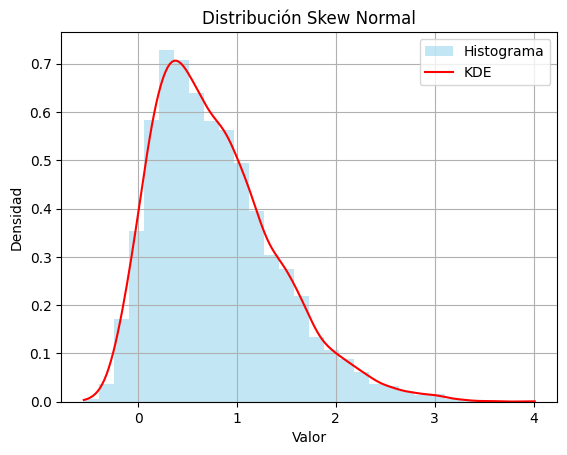

In [16]:
from scipy.stats import skew, kurtosis, skewnorm

# Parámetro de asimetría: positivo para asimetría positiva, negativo para negativa
shape = 5  # probá con diferentes valores como -5, 3, -3

# Generar datos de skew normal
data = skewnorm.rvs(a=shape, size=10000)

# Estadísticas
asimetria = skew(data)
curtosis_fisher = kurtosis(data, fisher=True)

print(f"Asimetría: {asimetria:.4f}")
print(f"Curtosis (exceso, Fisher): {curtosis_fisher:.4f}")

# Graficar KDE + histograma
plt.hist(data, bins=30, density=True, alpha=0.5, color='skyblue', label='Histograma')
from scipy.stats import gaussian_kde
kde = gaussian_kde(data)
x = np.linspace(min(data), max(data), 200)
plt.plot(x, kde(x), color='red', label='KDE')
plt.title("Distribución Skew Normal")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()
